#### 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Importing the pandas library and aliasing it as pd
import pandas as pd  

import numpy as np 
from scipy import stats
# Importing the seaborn library and aliasing it as sns
import seaborn as sns  

# Importing the pyplot module from the matplotlib library and aliasing it as plt
import matplotlib.pyplot as plt  

# Allowing plots to appear directly in the notebook
%matplotlib inline  

Import the CSV Data as Pandas DataFrame

In [3]:
# Reading a CSV file named 'brain_stroke.csv' into a pandas DataFrame and assigning it to the variable 'df'
df = pd.read_csv('../data/brain_stroke.csv')  

Show Top 5 Records

In [3]:
# Displaying the first few rows of the DataFrame 'df'
df.head()  

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Shape of the dataset

In [4]:
# Retrieving the Stroke of the DataFrame 'df'
df.shape  

(4981, 11)

#### 2.2 Dataset Columns
We have 6 numerical features: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

We have 5 categorical features: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
                       
                                   
                         
                                  
                       
                 
 
                        
                      
           




#### 3. Data Checks to perform

Check Missing values

Check Duplicates

Check data type

Check the number of unique values of each column

Check statistics of data set


#### 3.1 Check Missing values

In [5]:
# Calculating the sum of missing values (NaN) for each column in the DataFrame 'df'
df.isna().sum() 

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### 3.2 Check Zeros values

In [6]:
# Identifying cells where the value is equal to 0
missing = df.eq(0)  

# Summing up the occurrences of 0 for each column
display(missing.sum())  

gender                  0
age                     0
hypertension         4502
heart_disease        4706
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                     0
smoking_status          0
stroke               4733
dtype: int64

#### 3.3 Check Duplicates

In [7]:
# Counting the number of duplicated rows in the DataFrame 'df'
df.duplicated().sum()  

0

There are no duplicates values in the data set

#### 3.4 Check data types

In [8]:
# Displaying concise summary information about the DataFrame 'df'
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


##### 3.5 Checking the numerical and categorical columns

In [9]:
# Identifying numerical features by checking their data types
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

# Identifying categorical features by checking their data types
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Printing the number and names of numerical features
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))

# Printing the number and names of categorical features
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))


We have 6 numerical features: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

We have 5 categorical features: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [10]:
# Print unique values for object-type columns
for column in df.columns:  # Iterate over each column in the DataFrame
    if df[column].dtype == 'object':  # Check if the data type of the column is 'object'
        unique_values = df[column].unique()  # Get unique values of the column
        print(f"Unique values for column '{column}': {unique_values}")  # Print the unique values along with column name


Unique values for column 'gender': ['Male' 'Female']
Unique values for column 'ever_married': ['Yes' 'No']
Unique values for column 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children']
Unique values for column 'Residence_type': ['Urban' 'Rural']
Unique values for column 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


##### 3.6 Checking the number of unique values of each column

In [11]:
df.nunique()  # Count distinct observations over requested axis


gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

##### 3.7 Statistical Analysis

In [12]:
# Generating descriptive statistics for numerical columns in the DataFrame 'df'
df.describe()  

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [13]:
# Generating descriptive statistics for categorical (object) columns in the DataFrame 'df'
df.describe(include='O')  

,gender,ever_married,work_type,Residence_type,smoking_status
count,4981,4981,4981,4981,4981
unique,2,2,4,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2907,3280,2860,2532,1838


#### 4. Exploring Data ( Visualization )

4.1 Imbalance Stroke

stroke
0    4733
1     248
Name: count, dtype: int64


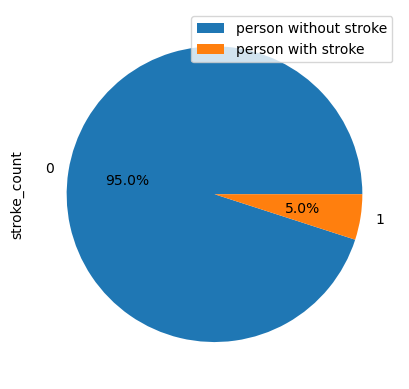

In [14]:
# Displaying the count of each unique value in the 'stroke' column
print(df['stroke'].value_counts())

# Grouping the DataFrame by the 'stroke' column and counting occurrences
stroke = df.groupby(['stroke']).agg(stroke_count=('stroke', 'count'))

# Creating a pie chart based on the 'stroke' column
stroke.plot.pie(y='stroke_count', autopct='%1.1f%%')

# Adding a legend with custom labels
plt.legend(labels=['person without stroke', 'person with stroke'])


# Displaying the plot
plt.show()

##### Group age variable

we can group the age into categories such as:

0-18: Children

19-35: Young Adults

36-55: Adults

56-75: Seniors


76 and above: Elderly


In [15]:
# Define BMI group categories
age_groups = {
    'Children': (0, 19),
    'Young Adults': (19, 36),
    'Adults': (36, 56),
    'Seniors': (56, 76),
    'Elderly': (76, float('inf'))
}

# Create a function to assign BMI groups
def get_age_group(age):
    for group, (lower, upper) in age_groups.items():
        if lower <= age < upper:
            return group

# Apply the function to create a new column for BMI groups
df['age_group'] = df['age'].apply(get_age_group)


In [16]:
# Count the number of individuals in each age group
age_group_counts = df['age_group'].value_counts()

# Print the counts
print(age_group_counts)

age_group
Adults          1463
Seniors         1213
Young Adults     961
Children         880
Elderly          464
Name: count, dtype: int64


##### Group BMI variable

In [17]:

# Define BMI group categories
bmi_groups = {
    'Underweight': (0, 18.6),
    'Normal Weight': (18.6, 25.1),
    'Overweight': (25.1, 30.1),
    'Obese': (30.1, float('inf'))
}

# Create a function to assign BMI groups
def get_bmi_group(bmi):
    for group, (lower, upper) in bmi_groups.items():
        if lower <= bmi < upper:
            return group

# Apply the function to create a new column for BMI groups
df['bmi_group'] = df['bmi'].apply(get_bmi_group)



In [18]:
# Count the number of individuals in each age group
age_group_counts = df['bmi_group'].value_counts()

# Print the counts
print(age_group_counts)

bmi_group
Obese            1888
Overweight       1500
Normal Weight    1261
Underweight       332
Name: count, dtype: int64


4.2 Imbalanced Categorical Features

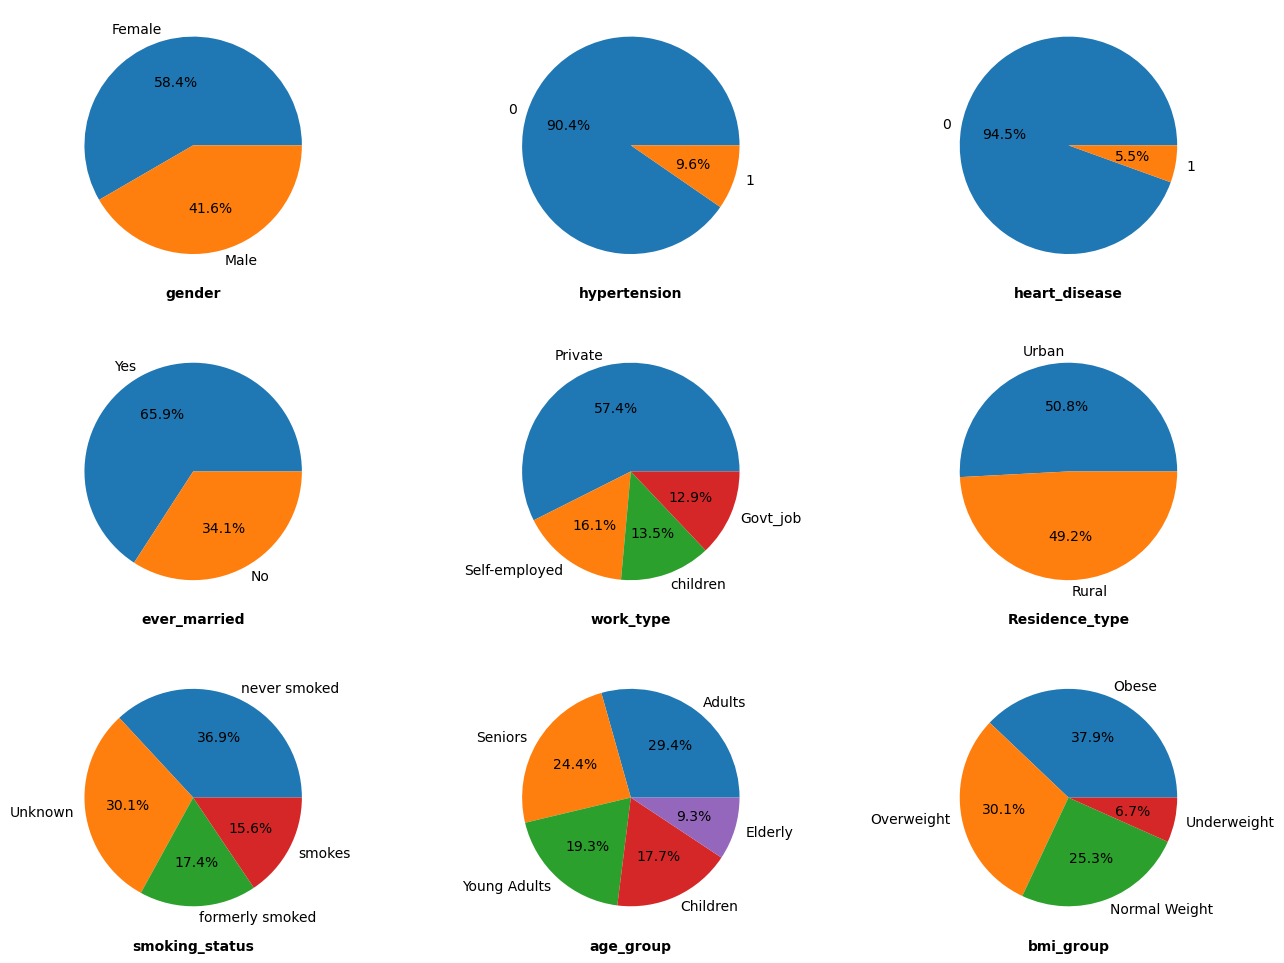

In [20]:
# Create a list containing categorical features
categorical_features =   ['gender', 'hypertension', 'heart_disease', 'ever_married',
                           'work_type', 'Residence_type', 'smoking_status','age_group','bmi_group']

# Set up a figure to contain subplots
plt.figure(figsize=(16, 12))

# Iterate over each categorical feature
for i, col in enumerate(categorical_features):
    # Create subplots in a 3x4 grid
    plt.subplot(3, 3, i+1)
    
    # Plot a pie chart for the distribution of each categorical column
    plt.pie(x=df[col].value_counts().values, 
            labels=df[col].value_counts().index, 
            autopct='%1.1f%%')
    
    # df.iplot(kind='pie',labels=df[col].value_counts().index, 
    #         pull=[0.02, 0.02, 0.1, 0.02])
    
    # Add a bold label for the feature name
    plt.xlabel(col, weight='bold')

# Show the plot
plt.show()


#####  4.5 Categrical Features with stroke

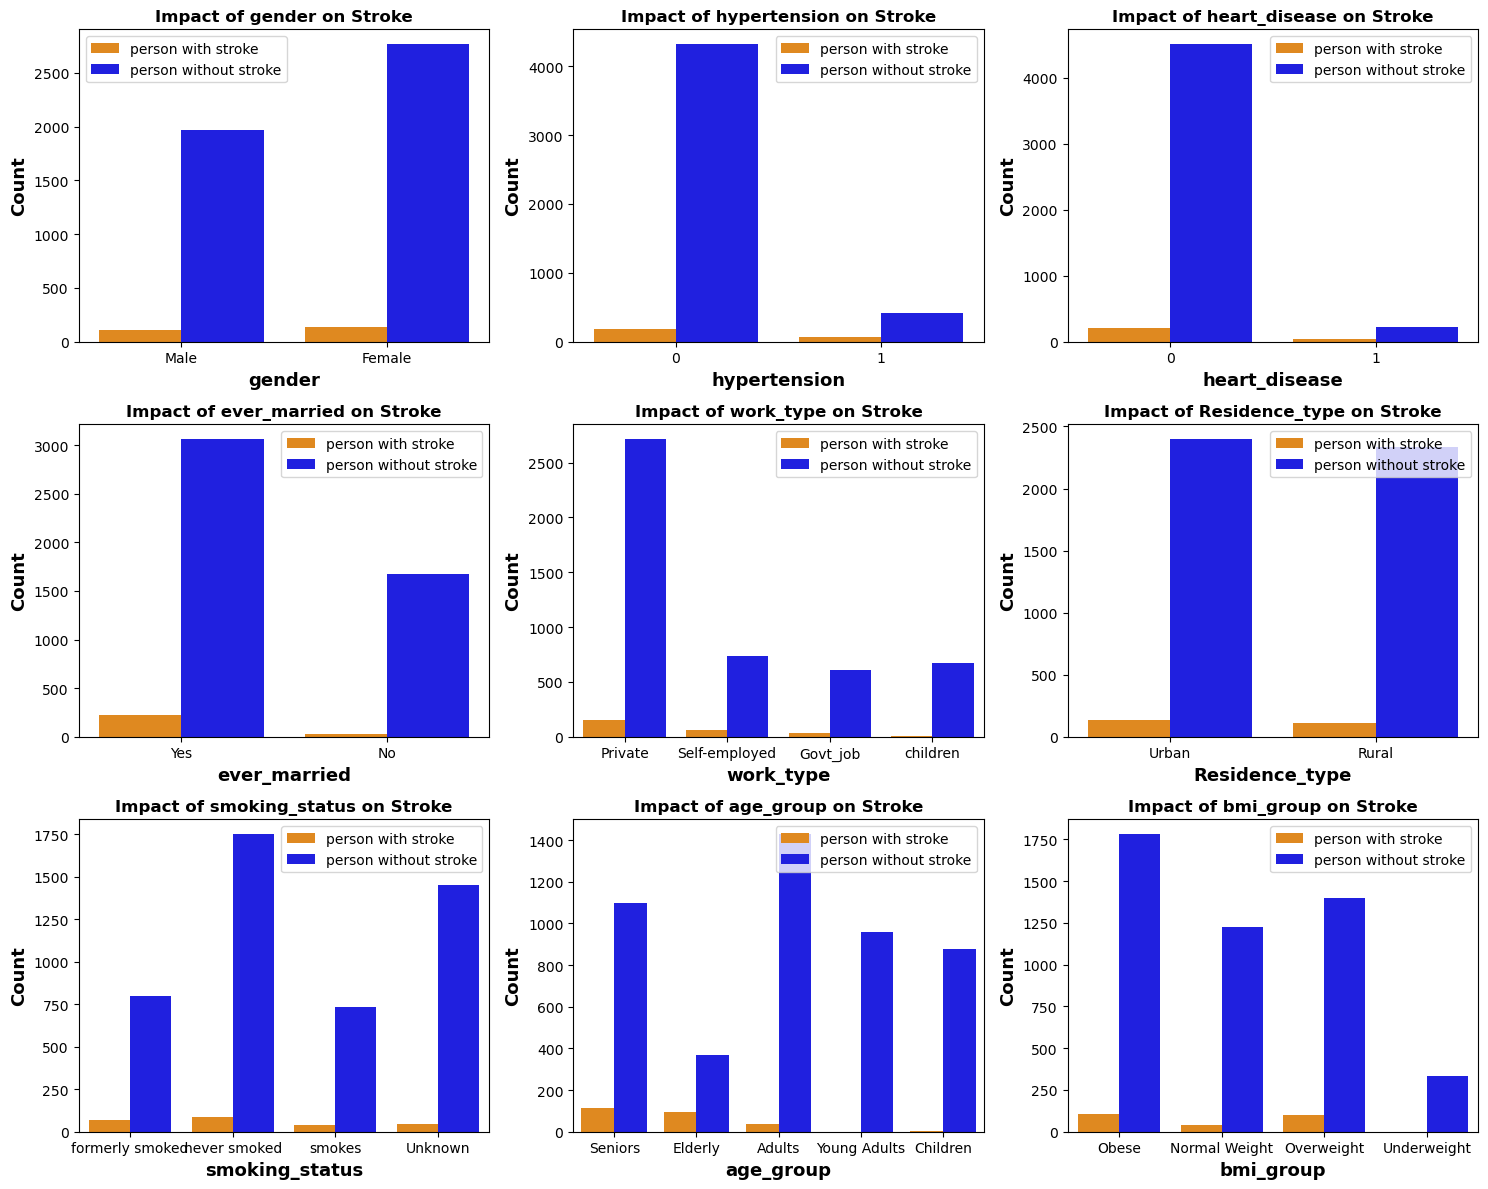

In [21]:

# Convert 'stroke' column to string type
df['stroke'] = df['stroke'].astype(str)
# Create subplots with a 3x4 grid layout
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
# Define the colors for stroke 1 and stroke 0
colors = {'0': 'blue', '1': 'darkorange'}

# Flatten the axes array to iterate over them
axes = axes.flatten()


# Loop through categorical features and plot countplots
for i, col in enumerate(categorical_features):
    # Plot countplots for each categorical feature with 'stroke' as hue
    sns.countplot(data=df, x=col, hue='stroke', ax=axes[i],palette=colors)
    
    # Set title for each subplot
    axes[i].set_title(f'Impact of {col} on Stroke', weight='bold')
    
    # Set labels for x and y axes
    axes[i].set_xlabel(col, size=13, weight='bold')
    axes[i].set_ylabel('Count', size=13, weight='bold')
    # Adding a legend with custom labels
    axes[i].legend(labels=['person with stroke', 'person without stroke'])

# Hide empty subplots if there are fewer categorical features than subplots
for j in range(len(categorical_features), len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()


# Show the plots
plt.show()


#### Encoding categorical features

In [22]:
df.drop(columns=['age_group','bmi_group'],inplace=True)
# Convert 'stroke' column to string type
df['stroke'] = df['stroke'].astype(int)


In [23]:
# Mapping 'gender' column values to numeric values
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

# Mapping 'ever_married' column values to numeric values
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})

# Mapping 'work_type' column values to numeric values
df['work_type'] = df['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3})

# Mapping 'Residence_type' column values to numeric values
df['Residence_type'] = df['Residence_type'].map({'Rural': 0, 'Urban': 1})

# Mapping 'smoking_status' column values to numeric values
df['smoking_status'] = df['smoking_status'].map({'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3})



##### 4.3 Visualize average score distribution to make some conclusion.

Histogram

Kernel Distribution Function (KDE)

c:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

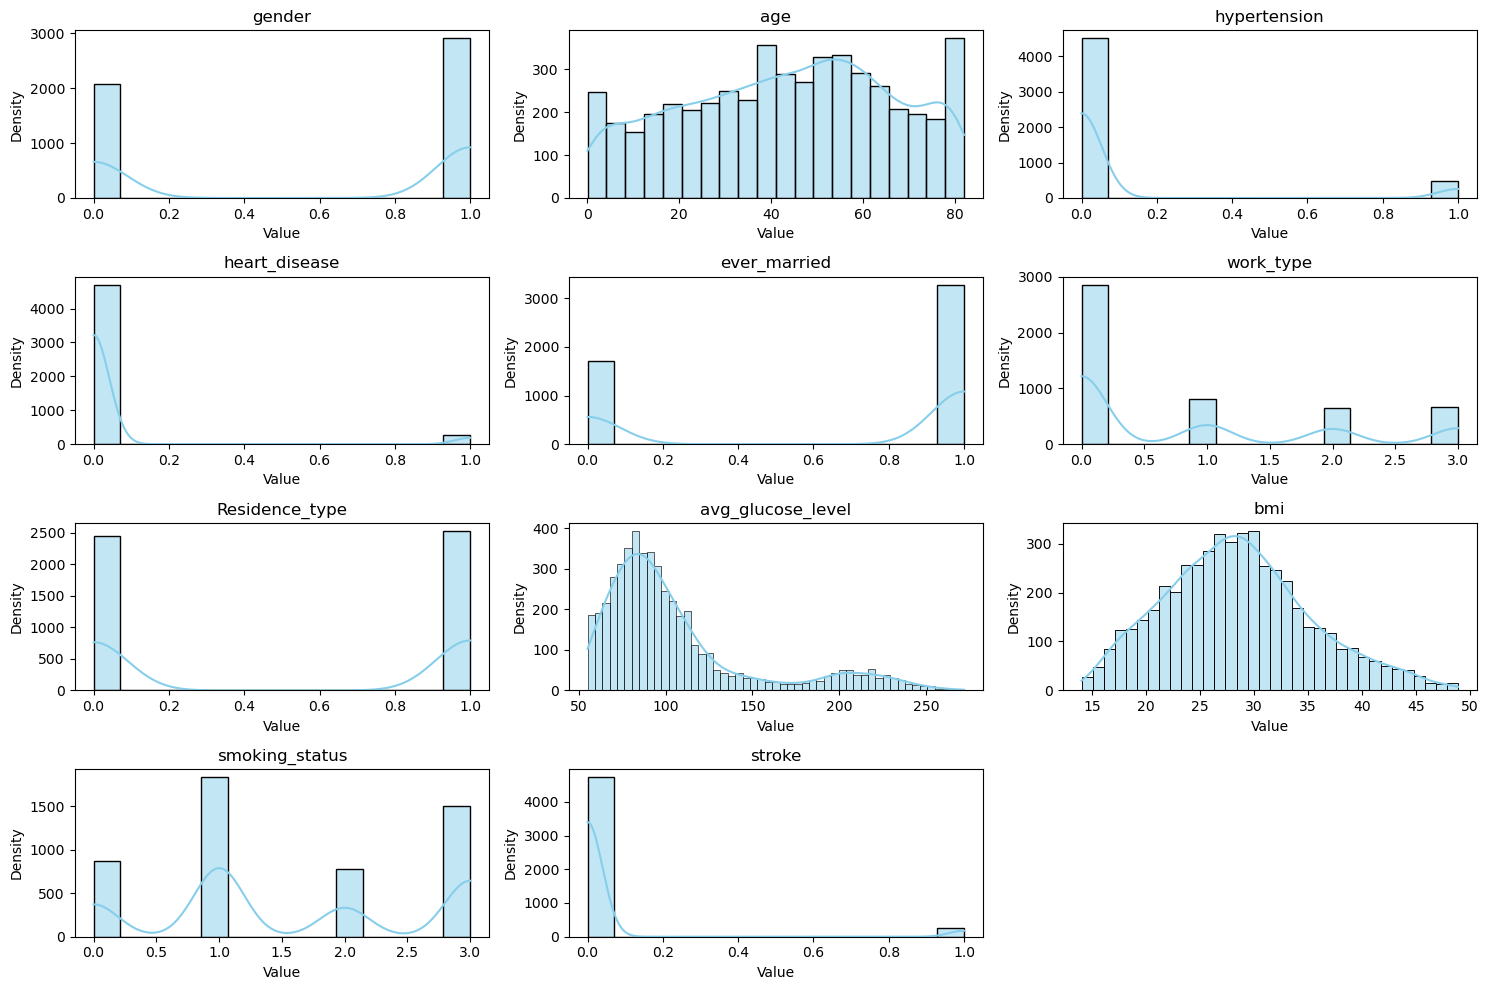

In [24]:
# Select numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['float', 'int']).columns

# Calculate the number of plots based on the number of numerical columns
num_plots = len(numerical_columns)

# Define the number of rows and columns for the grid layout
num_rows = 4 
num_cols = 3

# Create a figure and a set of subplots with the specified number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Loop through each numerical column and create a histogram with KDE on its corresponding subplot
for i, column in enumerate(numerical_columns):
    ax = axes[i]
    sns.histplot(df[column], kde=True, ax=ax, color='skyblue', edgecolor='black')  # Add KDE to the histogram
    ax.set_xlabel('Value')  # Set x-axis label
    ax.set_ylabel('Density')  # Set y-axis label
    ax.set_title(f'{column}')  # Set title for the subplot

# Hide empty subplots beyond the number of plots
for i in range(num_plots, num_rows*num_cols):
    axes[i].axis('off')  # Turn off axis for empty subplots

# Adjust the layout of subplots to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


#### 4.4 Numerical Features with stroke

In [25]:
# Displaying the count of each unique value in the 'stroke' column
print(df['stroke'].value_counts())

stroke
0    4733
1     248
Name: count, dtype: int64


c:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

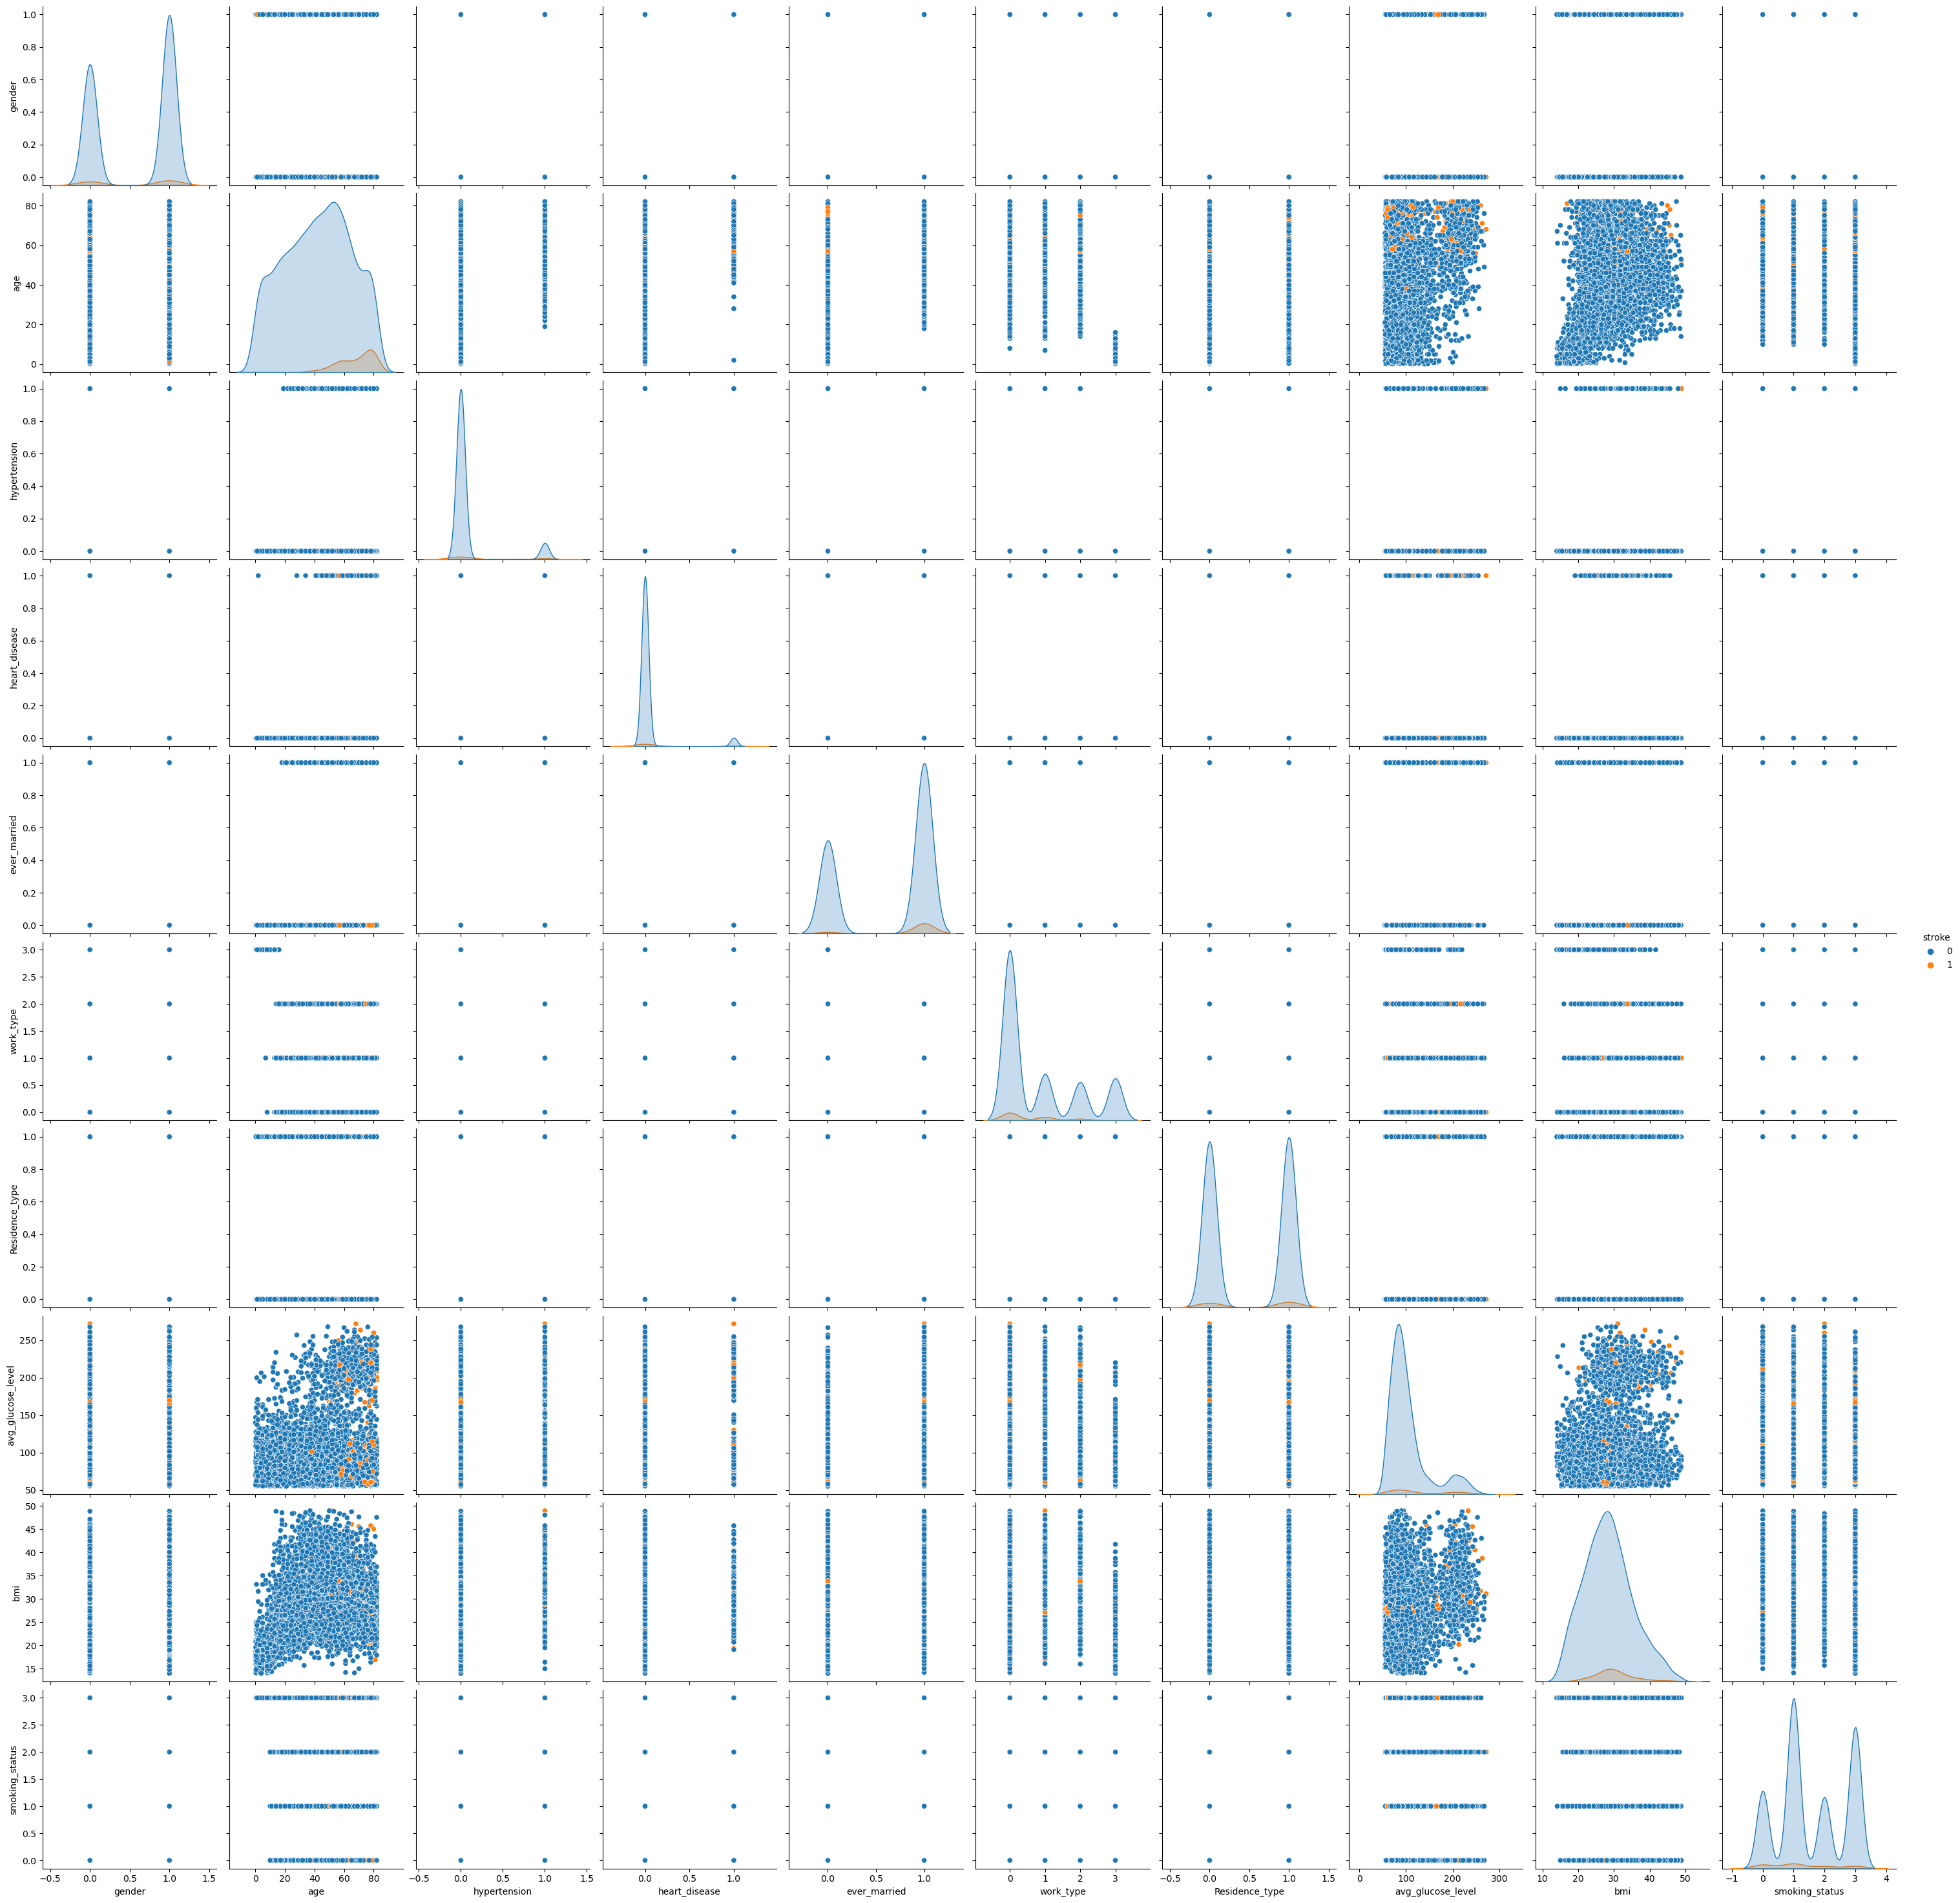

In [34]:
sns.pairplot(data=df, hue='stroke', height=3)
plt.show()

#### 4.6 Relationship between features

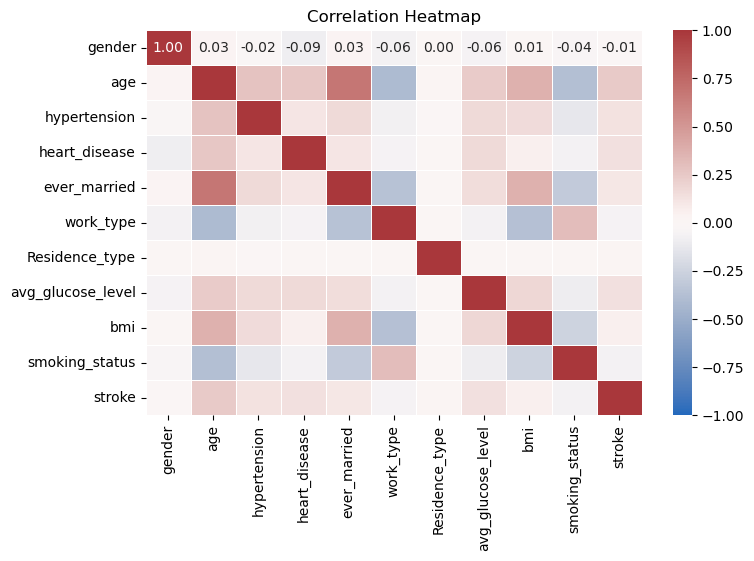

In [27]:
# correlation matrix
plt.figure(figsize=(8, 5), facecolor="white")  # Create a figure with specified size and background color

# plotting
sns.heatmap(
    data=df.corr(),  # Compute pairwise correlation of columns with numeric data types
    cmap="vlag",  # Color map for the heatmap
    vmin=-1, vmax=1,  # Set the range of values for colormap normalization
    linecolor="white", linewidth=0.5,  # Set line color and width between cells
    annot=True,  # Annotate each cell with the numeric value
    fmt=".2f"  # Format of the annotations
)

plt.title('Correlation Heatmap')  # Set the title of the plot
plt.show()  # Display the plot


#### Calculate the P-value

In [28]:
import pandas as pd
import scipy.stats as stats

# List of categorical features to test
categorical_features = ['age', 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Dictionary to store the results
chi_squared_results = {}

# Calculate the chi-squared test for each feature
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['stroke'])
    if not contingency_table.empty:
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
        chi_squared_results[feature] = p
    else:
        chi_squared_results[feature] = None  # or some placeholder value indicating an empty table

# Convert the results to a DataFrame
chi_squared_df = pd.DataFrame(list(chi_squared_results.items()), columns=['Feature', 'p-value'])
# Display the results
display(chi_squared_df)


,Feature,p-value
0,age,2.141512e-50
1,gender,5.755279e-01
2,hypertension,3.476842e-20
3,heart_disease,8.151357e-21
4,ever_married,3.412090e-14
5,work_type,2.312446e-10
6,Residence_type,2.717930e-01
7,smoking_status,2.547568e-06


##### 4.7 CHECKING OUTLIERS

In [29]:
# Create list of features_to_scale_robust
features_to_scale_robust = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
                             'Residence_type', 'avg_glucose_level',
                             'smoking_status','bmi']

# Function to count outliers and remove them from the dataframe
def count_outliers(feature_name, df):
    feature = df[feature_name]
    Q1 = feature.quantile(0.25)  # Calculate the first quartile
    Q3 = feature.quantile(0.75)  # Calculate the third quartile
    IQR = Q3 - Q1  # Calculate the interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Calculate the lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Calculate the upper bound for outliers
    outliers = (feature < lower_bound) | (feature > upper_bound)  # Identify outliers
    num_outliers = outliers.sum()  # Count the number of outliers
    df_without_outlier = df.loc[~outliers]  # Create a new DataFrame without outliers
    return num_outliers, df_without_outlier  # Return the number of outliers and the cleaned DataFrame

df_cleaned = df.copy()  # Create a copy of the original dataframe
total_outliers_deleted = 0  # Initialize variable to store the total number of deleted outliers

# Iterate through each feature
for feature in features_to_scale_robust:
    # Call count_outliers function to count outliers and get cleaned dataframe
    num_outliers, df_cleaned = count_outliers(feature, df_cleaned)
    print(f'Number of outliers in {feature}: {num_outliers}')  # Print the number of outliers for each feature
    total_outliers_deleted += num_outliers  # Add the number of outliers deleted for each feature

print(f'Total number of outliers deleted: {total_outliers_deleted}')  # Print the total number of outliers deleted


Number of outliers in gender: 0
Number of outliers in age: 0
Number of outliers in hypertension: 479
Number of outliers in heart_disease: 211
Number of outliers in ever_married: 0
Number of outliers in work_type: 0
Number of outliers in Residence_type: 0
Number of outliers in avg_glucose_level: 401
Number of outliers in smoking_status: 0
Number of outliers in bmi: 40
Total number of outliers deleted: 1131


In [30]:
#Check the amount of satisfied in df before dropping outliers
print ('The amount of Has stroke in df before dropping outliers: ', len(df[df['stroke'] == 1]))
#Check the amount of satisfied in df after dropping outliers
print ('The amount of Has stroke in df after dropping outliers: ', len(df_cleaned[df_cleaned['stroke'] == 1]))
#Check the amount of neutral or dissatisfied in df before dropping outliers
print ('The amount of No stroke in df before dropping outliers: ', len(df[df['stroke'] == 0]))
#Check the amount of neutral or dissatisfied in df after dropping outliers
print ('The amount of  No stroke in df after dropping outliers: ', len(df_cleaned[df_cleaned['stroke'] == 0]))


The amount of Has stroke in df before dropping outliers:  248
The amount of Has stroke in df after dropping outliers:  109
The amount of No stroke in df before dropping outliers:  4733
The amount of  No stroke in df after dropping outliers:  3741


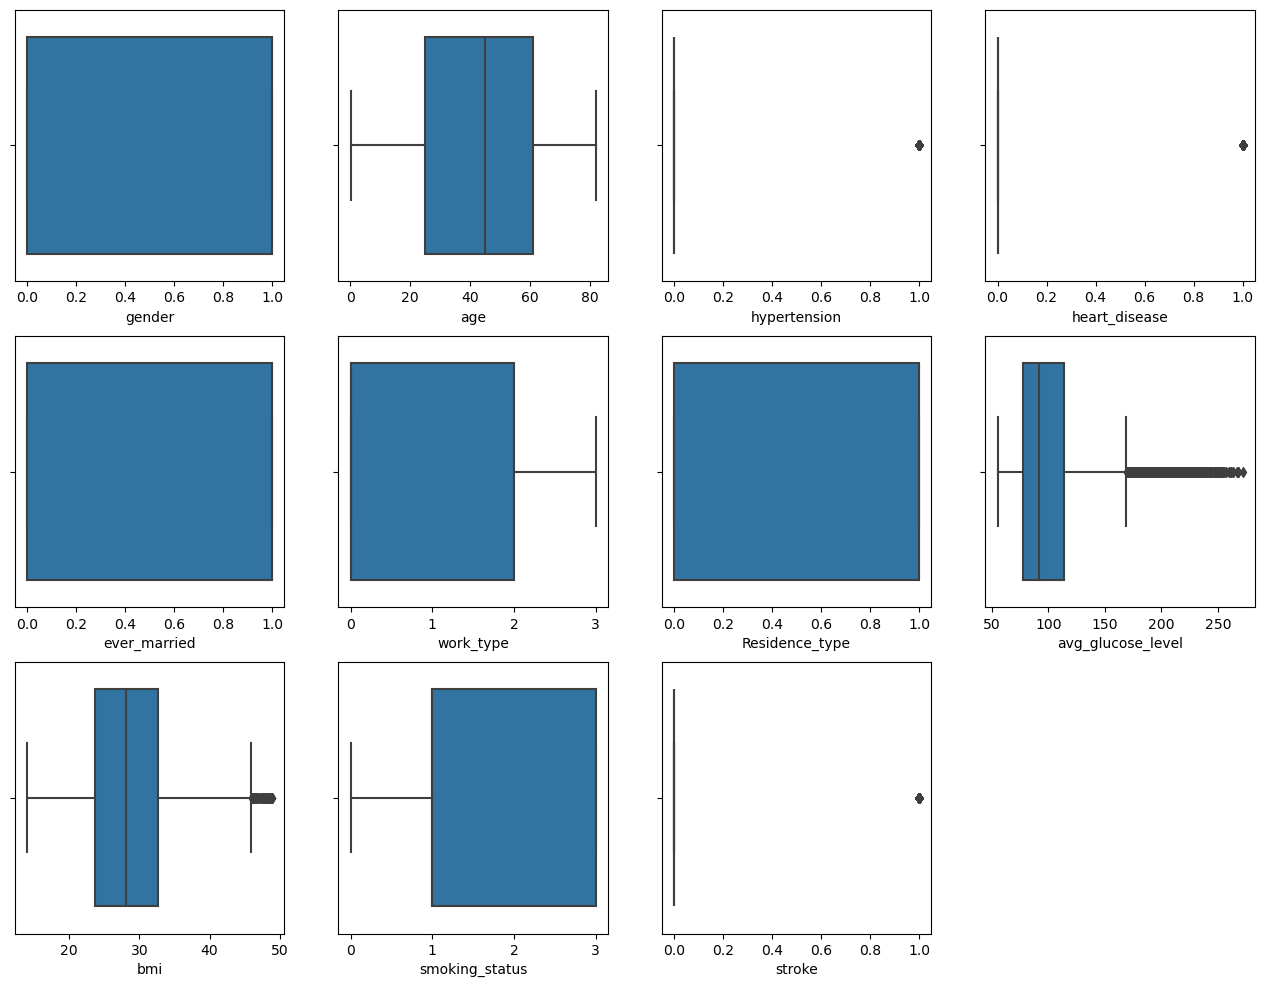

In [31]:
# Get numerical columns
numerical_columns = df.select_dtypes(include=['int','float']).columns
plt.figure(figsize=(16, 12))  # Set the figure size

# Iterate through each column in the DataFrame
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 4, i+1)  # Create subplots in a 3x3 grid
    sns.boxplot(x=col, data=df)  # Plot boxplot for the current column
plt.show()  #

#### 4.8 Check Highly correlated features with Storke

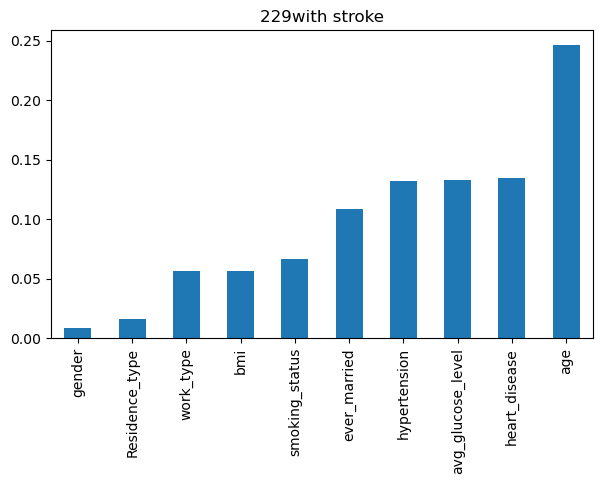

In [32]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Define a function to calculate the point-biserial correlation
def point_biserial_corr(df, target):
    correlations = {}
    for column in df.columns[:-1]:  # Exclude the last column ('stroke')
        if df[column].dtype in ['float64', 'int64']:  # Check if the feature is continuous
            corr, _ = stats.pointbiserialr(df[column], df[target])
            correlations[column] = abs(corr)
    return pd.Series(correlations).sort_values()

# Calculate the point-biserial correlation for each feature with 'stroke'
correlation_series = point_biserial_corr(df, 'stroke')

# Plot the bar chart
plt.figure(figsize=(7, 4))
d = correlation_series.plot(kind='bar', title='229with stroke')
plt.show()


Save cleaned data to csv file

In [33]:
df.to_csv('cleaned_data.csv', index=False) 